# Aula 1

## Vídeo 1.2

In [0]:
import pandas as pd

In [0]:
carbonico = pd.read_csv('co2.csv',sep='\t')

In [0]:
carbonico.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [0]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

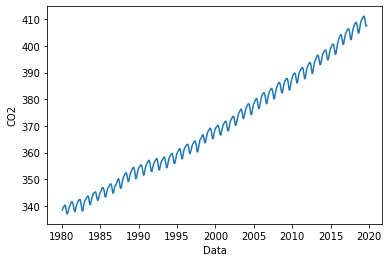

In [0]:
plt.plot(carbonico['data'],carbonico['media'])
plt.ylabel('CO2')
plt.xlabel('Data')

In [0]:
nasc = pd.read_csv('nascimentos.csv')

In [0]:
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 0, 'Data')

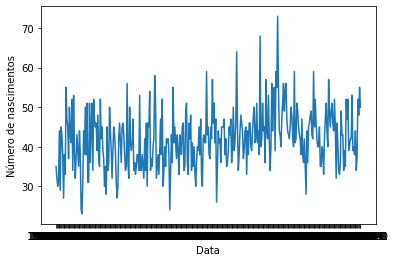

In [0]:
plt.plot(nasc["data"],nasc['n_nasc'])
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

In [0]:
nasc["data"] = pd.to_datetime(nasc["data"])

In [0]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0.5, 0, 'Data')

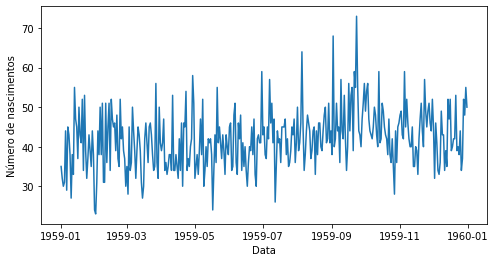

In [0]:
plt.figure(figsize = (8,4));
plt.plot(nasc["data"],nasc['n_nasc'])
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

## Vídeo 1.3

In [0]:
import numpy as np

In [0]:
media_carb = np.mean(carbonico["media"])

In [0]:
dt_carb = carbonico["data"][1]-carbonico["data"][0]

Text(0.5, 0, 'Data')

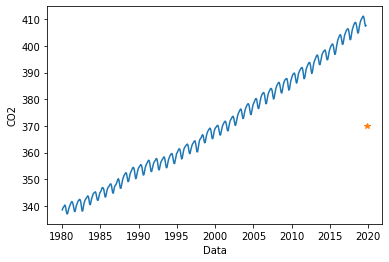

In [0]:
plt.plot(carbonico["data"],carbonico['media'])
plt.plot(carbonico.iloc[-1,0]+dt_carb,media_carb, '*')
plt.ylabel("CO2")
plt.xlabel("Data")

In [0]:
media_nasc = np.mean(nasc["n_nasc"])

In [0]:
dt_nasc = nasc["data"][1]-nasc["data"][0]

Text(0.5, 0, 'Data')

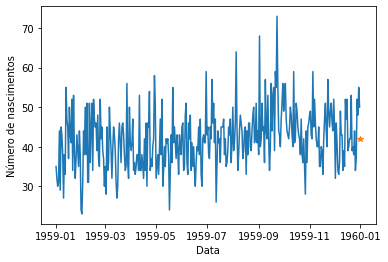

In [0]:
plt.plot(nasc["data"],nasc["n_nasc"])
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_nasc, '*')
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

In [0]:
carbonico.shape

(477, 2)

In [0]:
media_tres_pontos_c = np.mean(carbonico["media"][474:476])

Text(0.5, 0, 'Data')

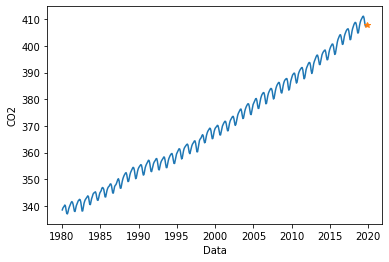

In [0]:
plt.plot(carbonico["data"],carbonico['media'])
plt.plot(carbonico.iloc[-1,0]+dt_carb,media_tres_pontos_c, '*')
plt.ylabel("CO2")
plt.xlabel("Data")

In [0]:
nasc.shape

(365, 2)

In [0]:
media_tres_pontos_n = np.mean(nasc["n_nasc"][362:364])

Text(0.5, 0, 'Data')

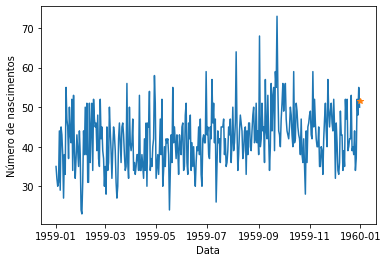

In [0]:
plt.plot(nasc["data"],nasc["n_nasc"])
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_tres_pontos_n, '*')
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

# Aula 2

## Vídeo 2.1

In [0]:
media_movel_c = carbonico.rolling(5).mean()

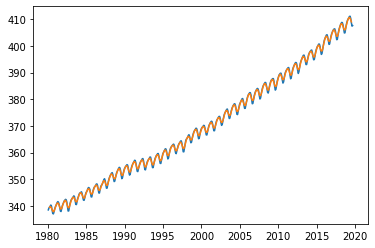

In [0]:
plt.plot(carbonico['data'],carbonico['media'])
plt.plot(media_movel_c['data'],media_movel_c['media'])

In [0]:
#A média móvel para o nascimento não retorna a coluna de data por causa do
# formato da data
media_movel_n = nasc.rolling(5).mean()

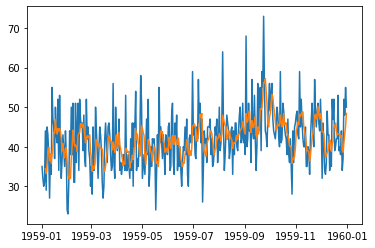

In [0]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.plot(nasc['data'],media_movel_n['n_nasc'])

In [0]:
#!pip install statsmodels==v0.11.0rc2

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
result_c = seasonal_decompose(carbonico.set_index('data'),period=35)

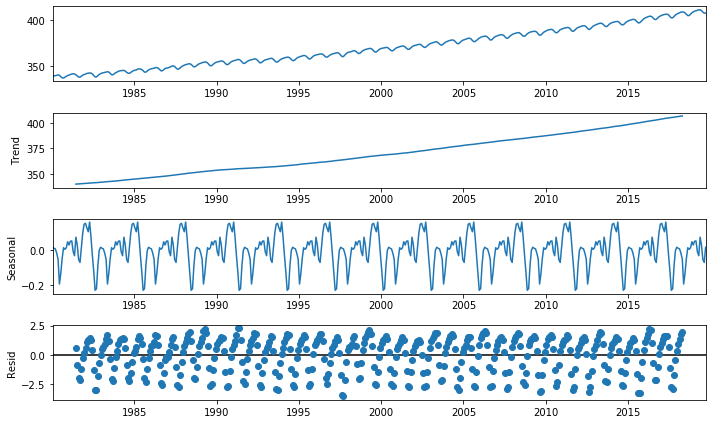

In [0]:
plt.rcParams['figure.figsize'] = (10,6)
result_c.plot();

In [0]:
result_n = seasonal_decompose(nasc.set_index('data'),period=35)

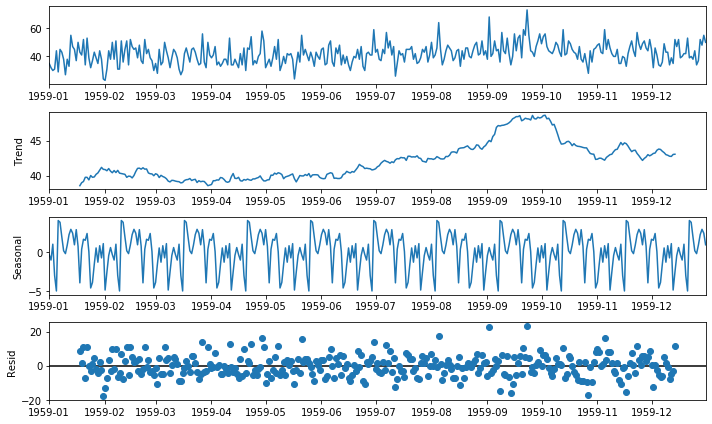

In [0]:
result_n.plot();

## Vídeo 2.2

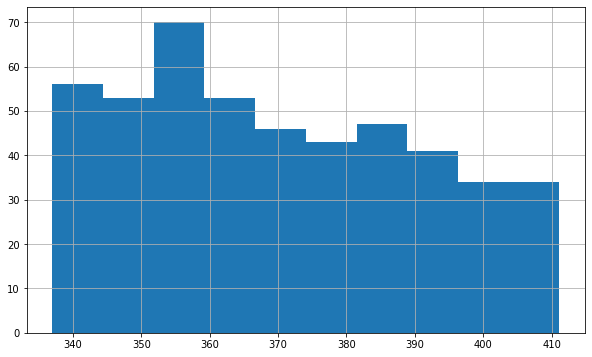

In [0]:
carbonico['media'].hist()

In [0]:
divide = int(len(carbonico)/2)

In [0]:
X = carbonico['media'].values

In [0]:
C1, C2 = X[0:divide],X[divide:]

In [0]:
C1.mean()

352.31550420168065

In [0]:
C2.mean()

387.816359832636

In [0]:
C1.var()

73.90219533401597

In [0]:
C2.var()

151.542490933282

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58882d82e8>]],
      dtype=object)

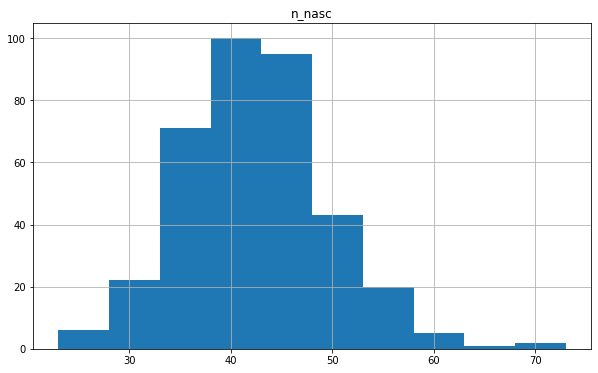

In [0]:
nasc.hist()

In [0]:
divide = int(len(nasc)/2)

In [0]:
X = nasc['n_nasc'].values

In [0]:
N1, N2 = X[0:divide],X[divide:]

In [0]:
N1.mean()

39.76373626373626

In [0]:
N2.mean()

44.185792349726775

In [0]:
N1.var()

49.21341021615746

In [0]:
N2.var()

48.708650601690096

## Vídeo 2.3

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
resultado_c = adfuller(carbonico['media'].values)

In [0]:
print('Estatística ADF',resultado_c[0])

Estatística ADF 3.036828829167


In [0]:
print('p-valor: %f' % resultado_c[1])

p-valor: 1.000000


In [0]:
resultado_n = adfuller(nasc['n_nasc'].values)

In [0]:
print('Estatística ADF',resultado_n[0])

Estatística ADF -4.808291253559765


In [0]:
print('p-valor: %f' % resultado_n[1])

p-valor: 0.000052


# Aula 3

## Vídeo 3.1

In [0]:
#Suavização Exponencial
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [0]:
carbonico = carbonico.set_index('data')

In [0]:
carbonico_treino = carbonico[1980.042:2015]
carbonico_teste = carbonico[2015:]

In [0]:
modelo_ajustado = SimpleExpSmoothing(carbonico_treino).fit(smoothing_level=0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
carbonico_teste.shape

(57, 1)

In [0]:
modelo_previsto = modelo_ajustado.forecast(57)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


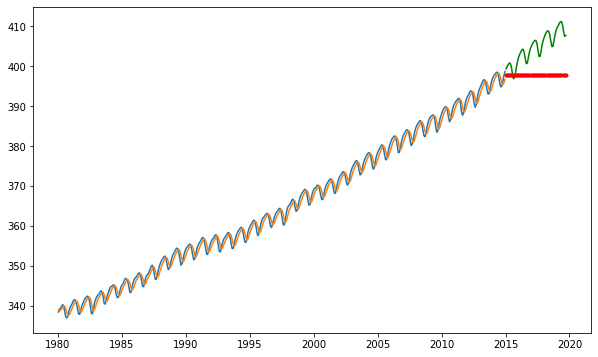

In [0]:
plt.plot(carbonico_treino)
plt.plot(carbonico_treino.index,modelo_ajustado.fittedvalues.values)
plt.plot(carbonico_teste,'g')
plt.plot(carbonico_teste.index,modelo_previsto,'r.')

In [0]:
nasc = nasc.set_index('data')

In [0]:
nasc_treino = nasc['1959-01-01':'1959-12-01']
nasc_teste = nasc['1959-12-01':]

In [0]:
nasc_teste.shape[0]

31

In [0]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level=0.5) #

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [0]:
modelo_previsto = modelo_ajustado.forecast(31)

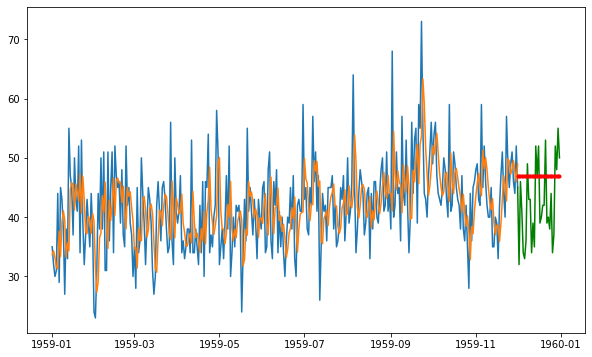

In [0]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index,modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index,modelo_previsto,'r.')

## Vídeo 3.3

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [0]:
modelo_ajustado = ExponentialSmoothing(carbonico_treino.values, trend='additive',
                                       seasonal='additive', seasonal_periods=35).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:735: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [0]:
carbonico_treino.shape

(420, 1)

In [0]:
carbonico_teste.shape

(57, 1)

In [0]:
modelo_previsto = modelo_ajustado.predict(start=420,end=476)

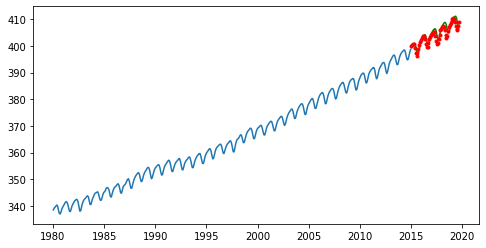

In [0]:
plt.figure(figsize = (8,4))
plt.plot(carbonico_treino)
plt.plot(carbonico_teste,'g')
plt.plot(carbonico_teste.index,modelo_previsto,'r.')

In [0]:
modelo_ajustado = ExponentialSmoothing(nasc_treino.values,
                                       trend='multiplicative', seasonal=None).fit()

In [0]:
nasc_treino.shape

(335, 1)

In [0]:
nasc_teste.shape

(31, 1)

In [0]:
modelo_previsto_suave = modelo_ajustado.predict(start=335,end=365)

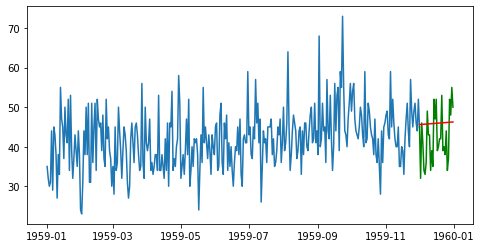

In [0]:
plt.figure(figsize = (8,4))
plt.plot(nasc_treino)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index,modelo_previsto_suave,'r-')

# Aula 4

## Aula 4.1

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

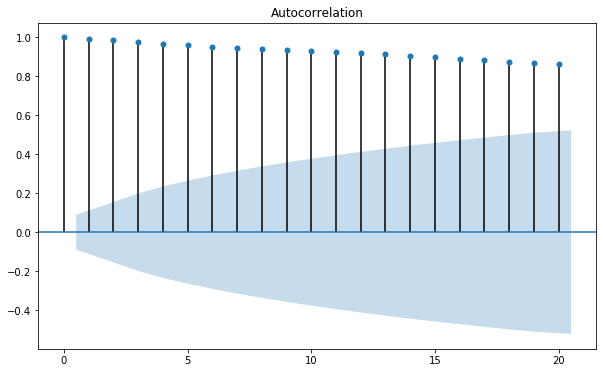

In [0]:
plot_acf(carbonico, lags=20);

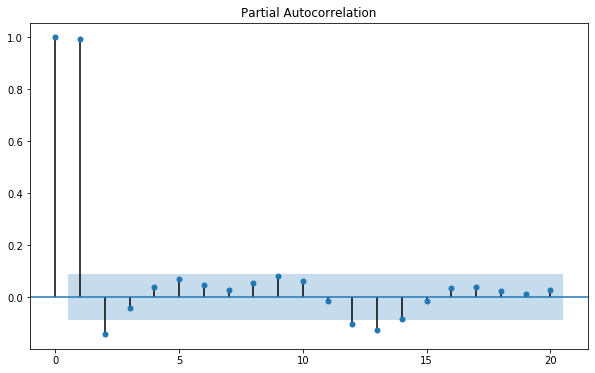

In [0]:
plot_pacf(carbonico, lags=20);

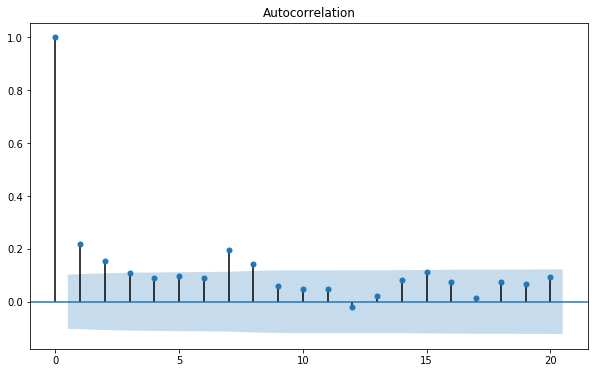

In [0]:
plot_acf(nasc['n_nasc'], lags=20);

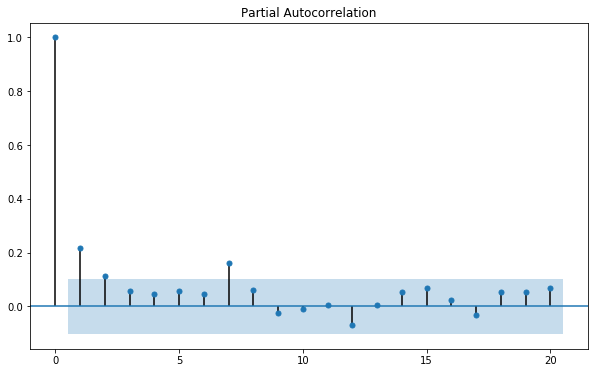

In [0]:
plot_pacf(nasc['n_nasc'], lags=20);

## Vídeo 4.3

In [0]:
from statsmodels.tsa.ar_model import AutoReg

In [0]:
lista = np.linspace(1,40,40)

In [0]:
modelo_ajustado = AutoReg(carbonico_treino.values, lags = lista,
                          trend='c',seasonal=True,period=35).fit()

In [0]:
modelo_previsto = modelo_ajustado.predict(start=420,end=476)

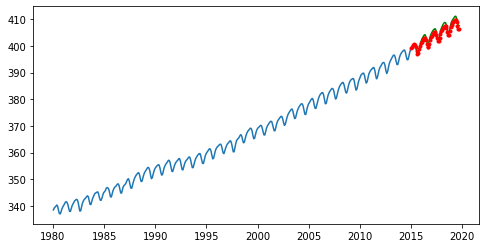

In [0]:
plt.figure(figsize = (8,4));
plt.plot(carbonico_treino);
plt.plot(carbonico_teste,'g');
plt.plot(carbonico_teste.index,modelo_previsto,'r.');

In [0]:
modelo_ajustado = AutoReg(nasc_treino.values, lags = lista, 
                          trend='c',seasonal=True,period=35).fit(use_t=True)

In [0]:
#[1,2,3,4,5,6]

In [0]:
modelo_previsto_ar = modelo_ajustado.predict(start=335,end=365)

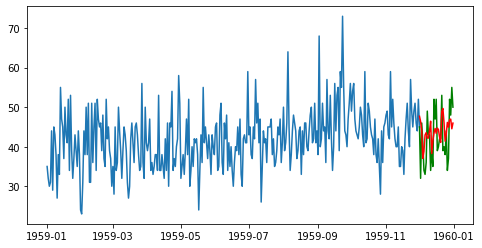

In [0]:
plt.figure(figsize = (8,4))
plt.plot(nasc_treino)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index,modelo_previsto_ar,'r')

# Aula 5

## Vídeo 5.1

### Erro de previsão

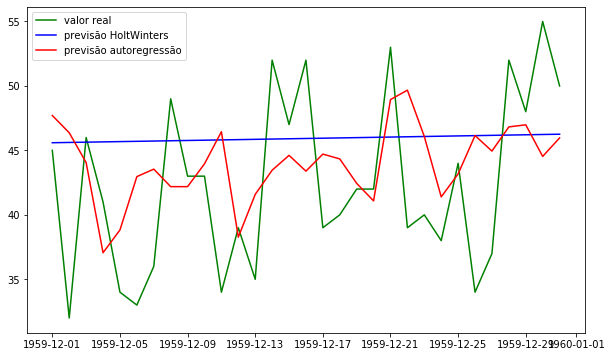

In [0]:
plt.plot(nasc_teste,'g', label='valor real')
plt.plot(nasc_teste.index,modelo_previsto_suave,'b-', label='previsão HoltWinters')
plt.plot(nasc_teste.index,modelo_previsto_ar,'r', label='previsão autoregressão')
plt.legend()

In [0]:
Erro_prev_s = nasc_teste['n_nasc'] - modelo_previsto_suave
Erro_prev = nasc_teste['n_nasc'] - modelo_previsto_ar

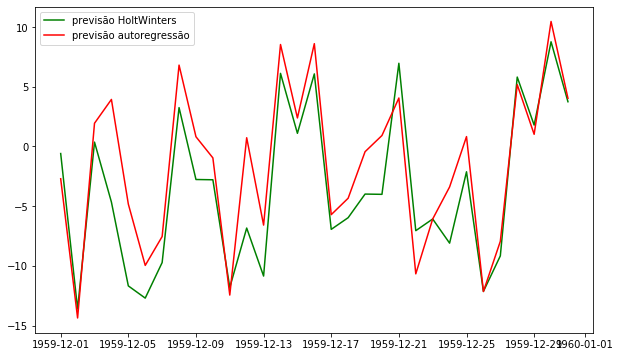

In [0]:
plt.plot(Erro_prev_s,'g',label='previsão HoltWinters')
plt.plot(Erro_prev,'r',label='previsão autoregressão')
plt.legend()

### Erro de previsão médio

In [0]:
np.mean(Erro_prev_s)

-3.5361257930475367

In [0]:
np.mean(Erro_prev)

-1.6083080804496934

### Erro absoluto médio

In [0]:
np.mean(np.abs(Erro_prev_s))

6.374537352069753

In [0]:
np.mean(np.abs(Erro_prev))

5.496720548092117

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
mae = mean_absolute_error(nasc_teste['n_nasc'], modelo_previsto_ar)

In [0]:
mae

5.496720548092117

### Erro médio quadrático da raiz

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_suave)

54.39586172649378

In [0]:
mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_ar)

45.43739422181245